In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2
from echolens import simulation

In [3]:
folder = '/pscratch/sd/l/lonappan/ECHOLENS'
model = ['d0','s0']
nside = 1024
ilc_bin = 50
cache = True

In [4]:
sky = simulation.CMBbharatSky(folder,nside,model,inc_fg=False,ilc_bins=ilc_bin,cache=cache)

In [5]:
alm,noise = sky.observed_cmb_alms(0)

alm2lenmap: using 256 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:00.822491] (33.1%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.036340] (1.5%)  
  build_angles                         :  [0:00:00.858872] (34.6%)  
  synthesis general (STANDARD)         :  [0:00:00.627427] (25.3%)  
  gclm2lenmap                          :  [0:00:02.394896] (96.4%)  
  synthesis general (GRAD_ONLY)        :  [0:00:00.901073] (36.3%)  
  polrot (ducc)                        :  [0:00:00.007476] (0.3%)  
  Total                                :  [0:00:02.483566] d:h:m:s:mus


In [6]:
cmbspectra = simulation.CMBspectra()
cl_len = cmbspectra.get_lensed_spectra(dl=False)

Text(0.5, 1.0, 'Harmonic ILC results')

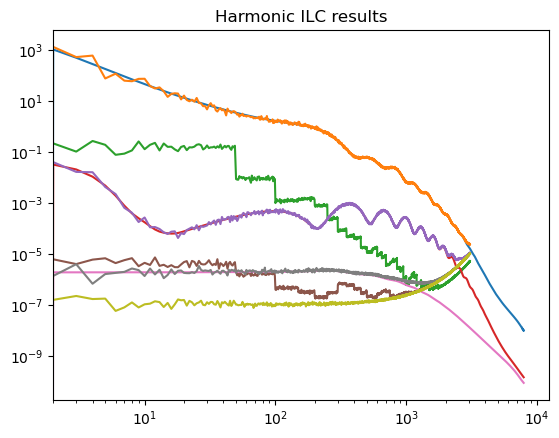

In [8]:
plt.loglog(cl_len['tt'])
plt.loglog(hp.alm2cl(alm[0]))
plt.loglog(hp.alm2cl(noise[0]))
plt.loglog(cl_len['ee'])
plt.loglog(hp.alm2cl(alm[1]))
plt.loglog(hp.alm2cl(noise[1]))
plt.loglog(cl_len['bb'])
plt.loglog(hp.alm2cl(alm[2]))
plt.loglog(hp.alm2cl(noise[2]))
plt.xlim(2,None)
plt.title('Harmonic ILC results')
